# Lab02

In [1]:
"""
import sys
!conda install --yes --prefix {sys.prefix} mglearn
"""

'\nimport sys\n!conda install --yes --prefix {sys.prefix} mglearn\n'

In [2]:
"""
import sys
!{sys.executable} -m pip install mglearn
"""

'\nimport sys\n!{sys.executable} -m pip install mglearn\n'

### SVM 이해하기
학습이 진행되는 동안 SVM은 각 훈련 데이터 포인트가 두 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지를 배우게 됩니다. 일반적으로 훈련 데이터의 일부만 결정 경계를 만드는 데 영향을 줍니다. 바로 두 클래스 사이의 경계에 위치한 데이터 포인트들입니다. 이런 데이터 포인트를 **서포트 벡터** 라고 하며, 여기서 서포트 벡터 머신이란 이름이 유래했습니다.

새로운 데이터 포인트에 대해 예측하려면 각 서포트 벡터와의 거리를 측정합니다. 분류 결정은 서포트 벡터까지의 거리에 기반하며 서포트 벡터의 중요도는 훈련 과정에서 학습합니다.(SVC객체의 dual_coef_ 속성에 저장됩니다).

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

from sklearn.svm import SVC


X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf',C=10, gamma =0.1).fit(X,y)

/home/kyle/samsung/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/home/kyle/samsung/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [4]:
matplotlib.__version__

'3.1.0'

Text(0, 0.5, 'feature 1')

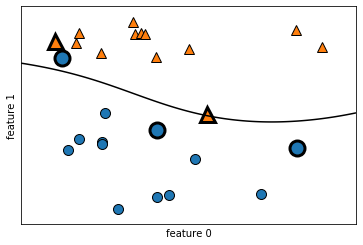

In [5]:
mglearn.plots.plot_2d_separator(svm,X,eps=.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)

#서포트 벡터
sv = svm.support_vectors_

#dual_coef_의 부호에 의해 서포트 벡터의 클래스 레이블이 결정됩니다.
sv_labels = svm.dual_coef_.ravel()>0
mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_labels,s=15,markeredgewidth=3)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

위의 그림은 두 개의 클래스를 가진 2차원 데이터셋에 서포트 벡터 머신을 학습시킨 결과를 보여줍니다. 결정 경계는 검은 실선으로, 서포트 벡터는 굵은 테두리로 크게 그렸습니다.
  
이 그림에서 SVM은 매우 부드럽고 비선형 (직선이 아닌) 경계를 만들었습니다. 여기서 사용한 두 매개변수 C와 gamma에 대해 살펴보겠습니다.

### SVM 매개변수

- gamma 매개변수는 가우시안 커널 폭의 역수에 해당합니다.   
    gamma 매개변수가 하나의 훈련 샘플이 미치는 영향의 범위를 결정합니다. 작은 값은 넓은 영역을 뜻하며 큰 값이라면 영향을 미치는 범위가 제한적입니다. 즉, 가우시안 커널의 반경이 클수록 훈련 샘플의 영향 범위도 커집니다.  
    gamma는 0보다 커야하므로 가우시안 커널 함수 값의 범위는 1~0 사이입니다. 따라서 gamma 값이 작을수록 데이터 포인트의 영향 범위가 커집니다.
- C 매개변수는 선형 모델에서 사용한 것과 비슷한 규제 매개변수입니다. 이 매개변수는 각 포인트의 중요도(dual_coef_값)를 제한합니다.

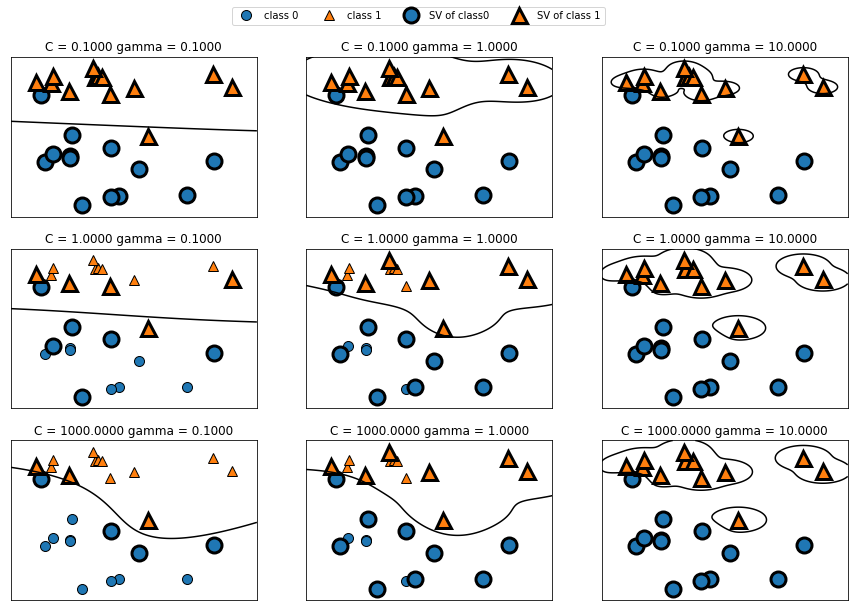

In [6]:
fig, axes = plt.subplots(3,3,figsize = (15,10))

for zx, C in zip(axes, [-1,0,3]):
    for a, gamma in zip(zx, range(-1,2)):
        mglearn.plots.plot_svm(log_C= C, log_gamma=gamma, ax = a)

axes[0,0].legend(["class 0","class 1", "SV of class0","SV of class 1"], ncol=4, loc=(.9,1.2))

> - 작은 gamma 값은 가우시안 커널의 반경을 크게 하여 많은 포인트들이 가까이 있는 것으로 고려됩니다. 그래서 왼쪽 그림의 결정 경계는 매우 부드럽고 오른쪽으로 갈수록 결정 경계는 하나의 포인트에 더 민감해집니다. 
> 
> - 작은 gamma 값이 결정 경계를 천천히 바뀌게 하므로 모델의 복잡도를 낮춥니다. 반면에 큰 gamma 값은 더 복잡한 모델을 만듭니다.
  
>  - 선형 모델에서처럼 작은 C는 매우 제약이 큰 모델을 만들고 각 데이터 포인트의 영향력이 작습니다.  
> 
> - C를 증가시키면 이 포인트들이 모델이 큰 영향을 주며 결정 경계를 휘어서 정확하게 분류하게 합니다.

### RBF 커널 SVM을 유방암 데이터셋에 적용해보기

> RBF 커널 SVM을 유방암 데이터셋에 적용해보겠습니다.  
    기본값 C=1, gamma = 1/n_features를 사용합니다.

In [7]:
from sklearn.model_selection import train_test_split
cancer = pd.read_csv('./data/cancer.csv')
X_train, X_test, y_train, y_test = train_test_split(cancer.iloc[:,0:29], cancer["malignant"],
                                                    random_state = 0)

svc = SVC()
svc.fit(X_train, y_train)

print("train set accuracy: {:.2f}".format(svc.score(X_train, y_train)))
print("test set accuracy: {:.2f}".format(svc.score(X_test,y_test)))

train set accuracy: 1.00
test set accuracy: 0.63


/home/kyle/samsung/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


훈련 세트에는 완벽한 점수를 냈지만 테스트 세트에는 63% 정확도라서 이 모델은 상당히 과대적합되었습니다.  
SVM은 잘 작동하는 편이지만 매개변수 설정과 데이터 스케일에 매우 민감합니다. 특히 입력 특성의 범위가 비슷해야 합니다. 각 특성의 최솟값과 최댓값을 로그 스케일로 나타내보겠습니다.

In [8]:
plt.boxplot(np.array(X_train), manage_xticks= True)
plt.yscale("symlog")  # y축을 로그 스케일링한다.
plt.xlabel("features list")
plt.ylabel("feature size")

TypeError: boxplot() got an unexpected keyword argument 'manage_xticks'

그래프를 보니 유방암 데이터셋의 특성은 자릿수 자체가 완전히 다름을 볼 수 있습니다.  
이것이 일부 모델에서도 어느 정도 문제가 될 수 있지만, SVM에서는 영향이 아주 큽니다.

### SVM을 위한 데이터 전처리

SVM에서는 모든 특성 값을 0과 1 사이로 맞추는 방법을 많이 사용합니다.  
3장에서 MinMaxScaler 전처리 메서드를 사용해서 이를 처리해보도록 하겠습니다.


In [ ]:
# 훈련 세트에서 특성별 최솟값 계산
min_on_training =  X_train.min(axis=0)
# 훈련 세트에서 특성별 (최댓값 - 최솟값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)

#훈련 데이터에 최솟값을 빼고 범위로 나누면 각 특성에 대해 최솟값은 0, 최댓값은 1입니다.
X_train_scaled = (X_train-min_on_training) / range_on_training

# 테스트 세트에도 같은 작업을 적용하지만
# 훈련 세트에서 계산한 최솟값과 범위를 사용합니다.
X_test_scaled = (X_test-min_on_training)/ range_on_training

## Support Vector Classifier를 학습합니다.
svc=SVC()
svc.fit(X_train_scaled, y_train)

# 모델의 score를 각각 출력합니다.
print("train set accuracy: {:.3f}".format(
svc.score(X_train_scaled, y_train)))
print("test set accuracy: {:.3f}".format(
svc.score(X_test_scaled, y_test)))


데이터의 스케일을 조정하니 결과가 크게 달라졌습니다. 훈련 세트와 테스트 세트의 정확도가 100%에서는 조금 멀어졌지만 매우 비슷해서 확실히 과소적합된 상태입니다.  
여기서 C나 gamma값을 증가시켜 좀 더 복잡한 모델을 만들 수 있습니다.

In [ ]:
## parameter값을 조정하여 설명력이 더 높은 모델을 만들어봅니다.
svc = SVC(C=500)
svc.fit(X_train_scaled,y_train)

# 모델의 score를 각각 출력합니다.
print("train set accuracy: {:.3f}".format(
svc.score(X_train_scaled, y_train)))
print("test set accuracy: {:.3f}".format(
svc.score(X_test_scaled, y_test)))
